# Run the whole deltas algorithm

In [28]:
%load_ext autoreload
%autoreload 2

import deltas
import numpy as np
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [29]:
binary = True
remove = []
remove = [2,3,4,5,6,7,8,9]
minority_id = [0]
split = 0.6
ratio = None
epochs = 1
data_clf = data.get_real_dataset(
    'MNIST', scale=False, binary=binary, classes_remove=remove, minority_id=minority_id,
    split=split, ratio=ratio, equal_test=True)
# print(len(data_clf['data']['y']))
# print(sum(data_clf['data']['y']))
# import numpy as np
# print(np.unique(data_clf['data']['y']))
# deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

12665 5923
MNIST: 12010
Number of attribues: 784
Classes total: 6087 - 5923

Classes train: 1348 - 1184
Classes test:  4739 - 4739


In [30]:
print(np.unique(data_clf['data']['y']))
print(np.unique(data_clf['data_test']['y']))

[0 1]
[0 1]


## Get Classifier

In [31]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model='MNIST',
                      binary=True,
                      epochs=epochs,
                      _plot=False)

data_clf['clf'] = classifiers_dict['Baseline']

for clf in ['Baseline', 'SMOTE']:
    print(clf, ':')
    classifiers_dict[clf].test(data_clf['data']['X'],
                            data_clf['data']['y'], data_s='train')
    classifiers_dict[clf].test(data_clf['data_test']['X'],
                            data_clf['data_test']['y'], data_s='test ')

Baseline :
train set: Accuracy: 0.9830173775671406
test  set: Accuracy: 0.9868115636210171
SMOTE :
train set: Accuracy: 0.990521327014218
test  set: Accuracy: 0.9927199831188014


## Fit deltas

In [32]:
classifiers_dict['Baseline'].test(data_clf['data']['X'],
                           data_clf['data']['y'], data_s='train')

train set: Accuracy: 0.9830173775671406


Original Data


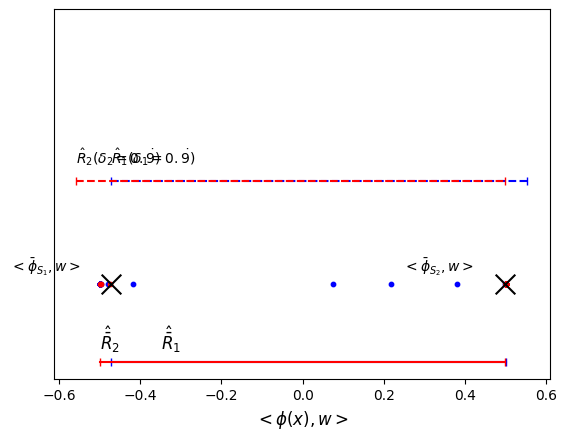

Trying random downsampling deltas (multiprocessing batches of 52):   0%|          | 0/24 [00:00<?, ?it/s]/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  inside_exp = 0.5*(np.square(((B*np.sqrt(N2))/(factor*R2)) - 2))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  inside_exp = 0.5*(np.square(((B*np.sqrt(N2))/(factor*R2)) - 2))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  inside_exp = 0.5*(np.square(((B*np.sqrt(N2))/(factor*R2)) - 2))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  inside_exp = 0.5*(np.square(((B*np.sqrt(N2))/(factor*R2)) - 2))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in 

In [43]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=False, 
                                                     _plot=True,
                                                    #  method='supports-prop-update_mean',
                                                     method='supports-prop-update_mean-margin_only',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

In [42]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

Not fit to any data yet, call 'fit(X, y)'  method first


## Show parameters

In [35]:
deltas_model.print_params()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

Not fit to any data yet, call 'fit(X, y)' or  method first
            Accuracy    G-Mean   ROC-AUC        F1
Method                                            
Baseline    0.986812  0.986776  0.986812  0.986921
SMOTE       0.992720  0.992711  0.992720  0.992750
BMR         0.988500  0.988486  0.988500  0.988559
Threshold   0.988500  0.988486  0.988500  0.988559
Our Method  0.986812  0.986776  0.986812  0.986921 


Baseline


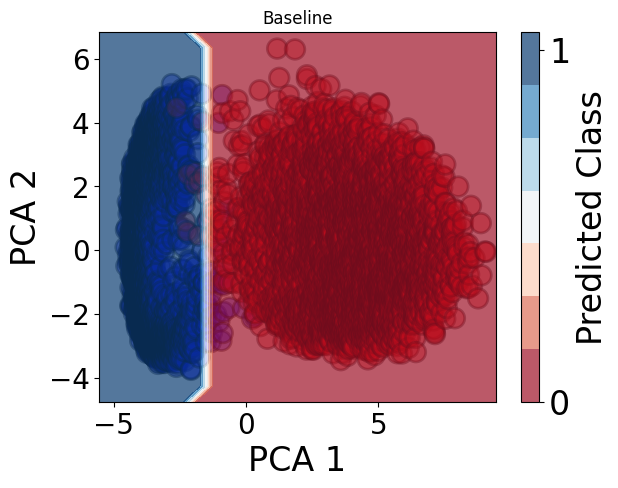

SMOTE


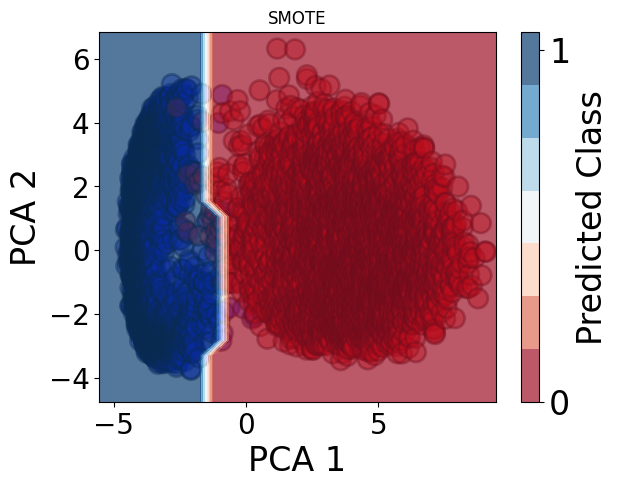

BMR


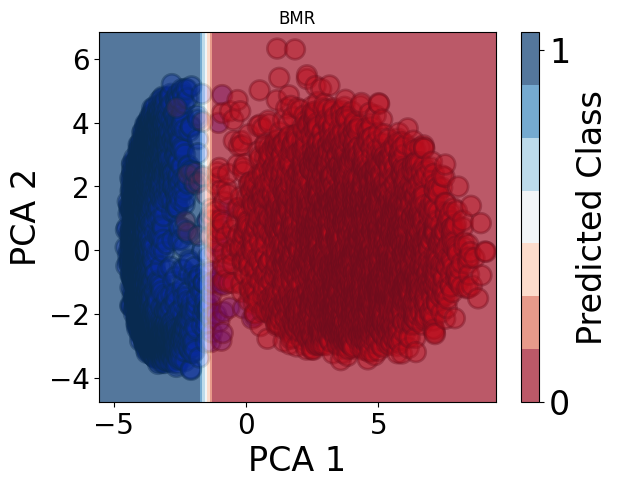

Threshold


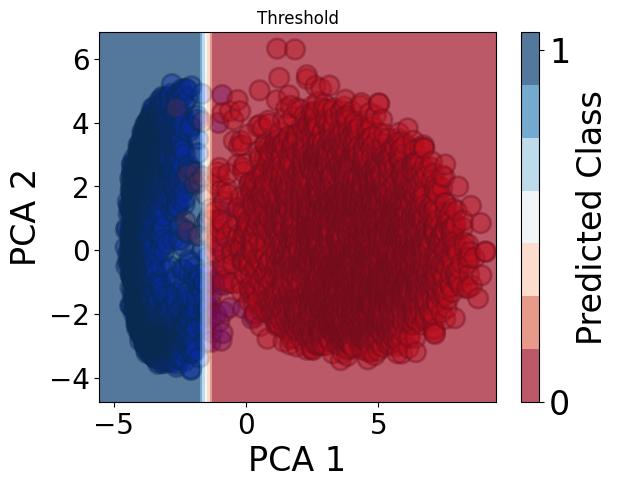

Our Method
Not fit to any data yet, call 'fit(X, y)' or  method first


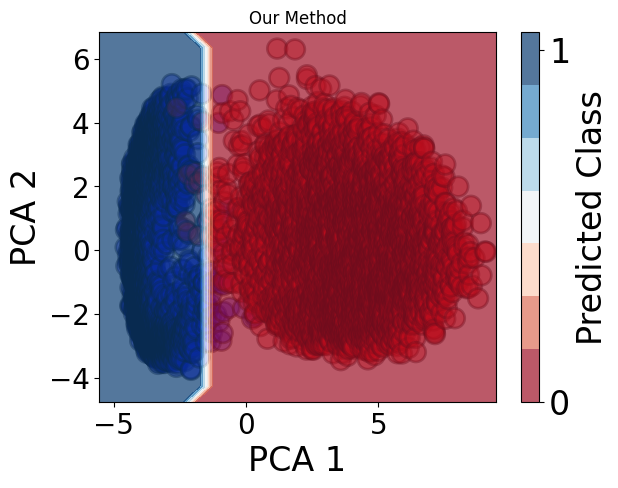

Giving bias from original classifier


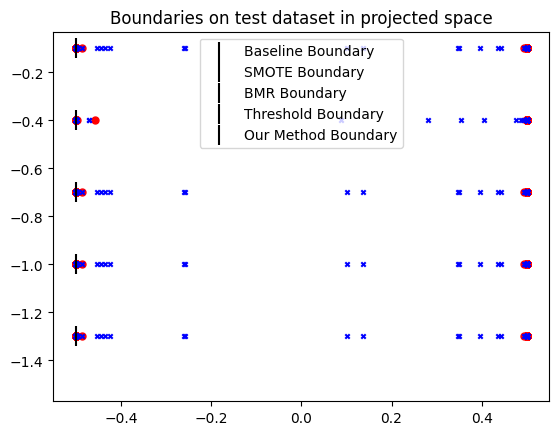

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Baseline & 0.9868 & 0.9868 & 0.9868 & 0.9869 \\
SMOTE & 0.9927 & 0.9927 & 0.9927 & 0.9927 \\
BMR & 0.9885 & 0.9885 & 0.9885 & 0.9886 \\
Threshold & 0.9885 & 0.9885 & 0.9885 & 0.9886 \\
Our Method & 0.9868 & 0.9868 & 0.9868 & 0.9869 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Baseline,0.986812,0.986776,0.986812,0.986921
SMOTE,0.992720,0.992711,0.992720,0.992750
BMR,0.988500,0.988486,0.988500,0.988559
Threshold,0.988500,0.988486,0.988500,0.988559
Our Method,0.986812,0.986776,0.986812,0.986921


In [36]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])